## **cifar10 dataset**
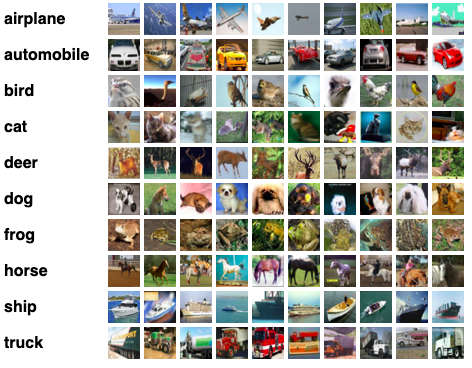

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

In [ ]:
# preparing the dataset

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype("float32") / 225.0
X_test = X_test.astype("float32") / 225.0

num_classes = 10
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
print(X_train.shape)
print(Y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [2]:
# Building the Model

model = keras.Sequential(
    [
     keras.Input(shape=(32, 32, 3)),
     layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
     layers.MaxPooling2D(pool_size=(2,2)),
     layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
     layers.MaxPooling2D(pool_size=(2,2)),
     layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(10, activation='softmax')   
    ]
)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 8192)              0

In [ ]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = keras.optimizers.Adam(learning_rate=2e-4),
    metrics = ["accuracy"],
)

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.1)

Epoch 1/20
704/704 [==============================] - 13s 7ms/step - loss: 1.6601 - accuracy: 0.3990 - val_loss: 1.4353 - val_accuracy: 0.4796
Epoch 2/20
704/704 [==============================] - 4s 6ms/step - loss: 1.3268 - accuracy: 0.5277 - val_loss: 1.2225 - val_accuracy: 0.5754
Epoch 3/20
704/704 [==============================] - 4s 6ms/step - loss: 1.1875 - accuracy: 0.5813 - val_loss: 1.1514 - val_accuracy: 0.5954
Epoch 4/20
704/704 [==============================] - 4s 6ms/step - loss: 1.0908 - accuracy: 0.6161 - val_loss: 1.0795 - val_accuracy: 0.6210
Epoch 5/20
704/704 [==============================] - 4s 6ms/step - loss: 1.0173 - accuracy: 0.6460 - val_loss: 0.9914 - val_accuracy: 0.6546
Epoch 6/20
704/704 [==============================] - 4s 6ms/step - loss: 0.9546 - accuracy: 0.6665 - val_loss: 0.9612 - val_accuracy: 0.6676
Epoch 7/20
704/704 [==============================] - 4s 6ms/step - loss: 0.9066 - accuracy: 0.6839 - val_loss: 0.9292 - val_accuracy: 0.6920
Epoch

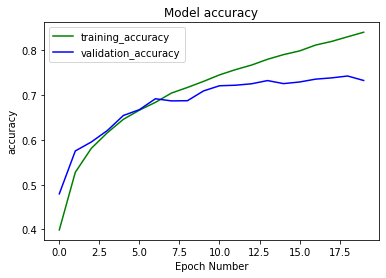

In [ ]:
import matplotlib.pyplot as plt
plt.title('Model accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'],'g',label = 'training_accuracy')
plt.plot(history.history['val_accuracy'],'b', label = 'validation_accuracy')
plt.legend()

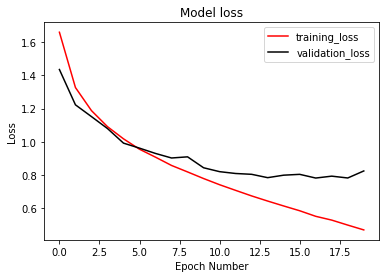

In [ ]:
import matplotlib.pyplot as plt
plt.title('Model loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'],'r',label = 'training_loss')
plt.plot(history.history['val_loss'],'k', label = 'validation_loss')
plt.legend()